## CME538 GROUP PROJECT

### TTC SUBWAY, TTC BUS AND OC TRANSPO DATA VISUALIZATIONS

### Set up Notebook

In [1]:
import pandas as pd
# 3rd party imports
import os
import json
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import math
import numpy as np

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

In [2]:
# Import data
ttc_subway_df = pd.read_csv("ttc_subway_df.csv")
ttc_bus_df = pd.read_csv("ttc_bus_df.csv")
octranspo_df = pd.read_csv("OC_Transpo_Bus_Info_With_Times.csv")
stm_df = pd.read_csv("stm_df.csv")


C:\Users\katwe\AppData\Local\Temp\ipykernel_9228\3802667290.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ttc_bus_df = pd.read_csv("ttc_bus_df.csv")



### TTC SUBWAY

In [3]:
ttc_subway_df.head()

,Unnamed: 0,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,0,2018-01-01,00:29,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986
1,1,2018-01-01,01:07,Monday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0
2,2,2018-01-01,01:22,Monday,MUSEUM STATION,MUSC,0,0,N,YU,5751
3,3,2018-01-01,01:28,Monday,BAY LOWER,EUOE,0,0,NaN,BD,5222
4,4,2018-01-01,01:39,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781


In [4]:
# print dataframe info
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Date        108004 non-null  object
 2   Time        108004 non-null  object
 3   Day         108004 non-null  object
 4   Station     108004 non-null  object
 5   Code        108004 non-null  object
 6   Min Delay   108004 non-null  int64 
 7   Min Gap     108004 non-null  int64 
 8   Bound       79240 non-null   object
 9   Line        107675 non-null  object
 10  Vehicle     108004 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.1+ MB


In [5]:
#Convert the 'Date' colum to datetime format
ttc_subway_df['Date'] = pd.to_datetime(ttc_subway_df['Date'])
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  108004 non-null  int64         
 1   Date        108004 non-null  datetime64[ns]
 2   Time        108004 non-null  object        
 3   Day         108004 non-null  object        
 4   Station     108004 non-null  object        
 5   Code        108004 non-null  object        
 6   Min Delay   108004 non-null  int64         
 7   Min Gap     108004 non-null  int64         
 8   Bound       79240 non-null   object        
 9   Line        107675 non-null  object        
 10  Vehicle     108004 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 9.1+ MB


In [6]:
# Set the data colum as the index
#Subway DF
ttc_subway_df.set_index('Date', inplace = True)
ttc_subway_df.head()



,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,,
2018-01-01,0,00:29,Monday,SHEPPARD WEST STATION,MUATC,10,15,N,YU,5986
2018-01-01,1,01:07,Monday,DUNDAS STATION,MUNCA,0,0,NaN,YU,0
2018-01-01,2,01:22,Monday,MUSEUM STATION,MUSC,0,0,N,YU,5751
2018-01-01,3,01:28,Monday,BAY LOWER,EUOE,0,0,NaN,BD,5222
2018-01-01,4,01:39,Monday,MUSEUM STATION,MUO,6,11,S,YU,5781


### Time-based indexing

In [7]:
# Add new columns 'year', 'month' and 'month_day'that indicate the year, month and day associated with each observation

ttc_subway_df['year'] = ttc_subway_df.index.year
ttc_subway_df['month'] = ttc_subway_df.index.month
ttc_subway_df['month_day'] = ttc_subway_df.index.day
ttc_subway_df.tail()

,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day
Date,,,,,,,,,,,,,
2023-09-30,107999,00:19,Saturday,UNION STATION,MUPAA,5,11,N,YU,5516,2023,9,30
2023-09-30,108000,00:26,Saturday,LAWRENCE STATION,MUPAA,6,12,N,YU,5461,2023,9,30
2023-09-30,108001,00:29,Saturday,BLOOR STATION,SUO,0,0,NaN,YU,0,2023,9,30
2023-09-30,108002,01:03,Saturday,COLLEGE STATION,MUSAN,6,12,N,YU,5516,2023,9,30
2023-09-30,108003,01:37,Saturday,EGLINTON STATION,SUDP,8,14,S,YU,5441,2023,9,30


In [8]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108004 entries, 2018-01-01 to 2023-09-30
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Time        108004 non-null  object
 2   Day         108004 non-null  object
 3   Station     108004 non-null  object
 4   Code        108004 non-null  object
 5   Min Delay   108004 non-null  int64 
 6   Min Gap     108004 non-null  int64 
 7   Bound       79240 non-null   object
 8   Line        107675 non-null  object
 9   Vehicle     108004 non-null  int64 
 10  year        108004 non-null  int32 
 11  month       108004 non-null  int32 
 12  month_day   108004 non-null  int32 
dtypes: int32(3), int64(4), object(6)
memory usage: 10.3+ MB


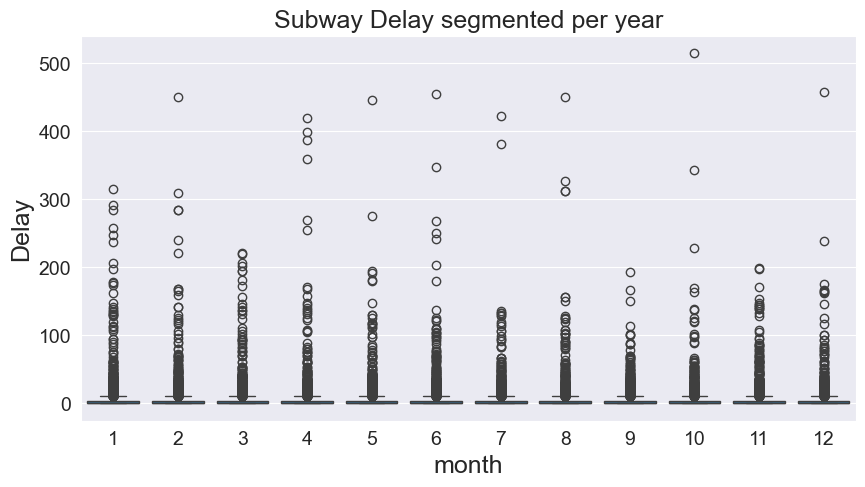

In [9]:
# PLot boxplot of delay per year
plt.figure(figsize=(10, 5))
plt.title('Subway Delay segmented per year', fontsize=18)
ax = sns.boxplot(x = ttc_subway_df['month'] , y = ttc_subway_df['Min Delay'])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('month', fontsize=18)
ax.set_ylabel('Delay', fontsize=18)
plt.show()

#I don't know why it doesnt graph boxplots
# it has graphed the box plots, they are just generally quite small delays so the boxplots are all down in the 1 min range. 

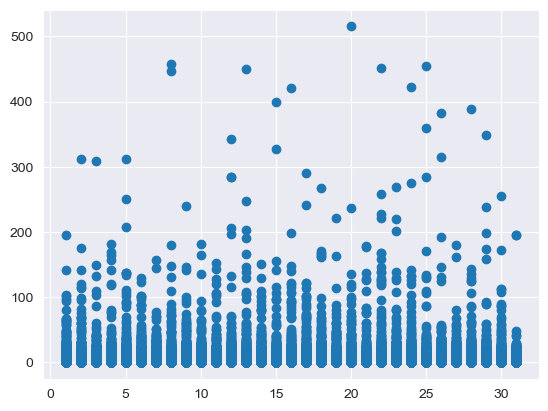

In [10]:
plt.scatter(ttc_subway_df['month_day'], ttc_subway_df['Min Delay'])
plt.show()

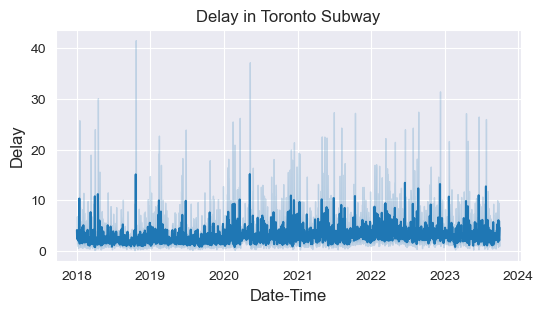

In [11]:
#Plot Toronto Delay
plt.figure(figsize=(6,3))
sns.lineplot(x=ttc_subway_df.index, y=ttc_subway_df['Min Delay'])

# Set labels 
plt.xlabel('Date-Time', fontsize=12)
plt.ylabel('Delay', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

### TTC BUS 

In [12]:
#Convert the 'Date' colum to datetime format
ttc_bus_df['Date'] = pd.to_datetime(ttc_bus_df['Date'])
ttc_bus_df.info()

KeyError: 'Date'

In [ ]:
# Set the data colum as the index

ttc_bus_df.set_index('Date', inplace = True)
ttc_bus_df.head()

In [ ]:
plt.figure(figsize=(6,3))
sns.lineplot(x=ttc_bus_df.index, y=ttc_bus_df['Min Delay'])

# Set labels 
plt.xlabel('Date-Time', fontsize=12)
plt.ylabel('Delay', fontsize=12)
plt.title("Delay in Toronto Buses")

plt.show()

### EXPLORATORY DATA ANALYSIS

In [ ]:
ttc_subway_df.info()

## Outliers

In [ ]:
ttc_subway_df.describe()

In [ ]:
# Create probability density plot 
plt.figure(figsize=(6,3))
ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')

# Set labels and legend
plt.xlabel('Delays in minutes', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of subway delays')

#Change tick sizes
ttc_delays.xaxis.set_tick_params(labelsize=8)
ttc_delays.yaxis.set_tick_params(labelsize=8)

# Show the plot
plt.show()

In [ ]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1= ttc_subway_df['Min Delay'].quantile(0.25)
Q3= ttc_subway_df['Min Delay'].quantile(0.75)
IQR =Q3-Q1

#Define the bounds for outlier removal
lower_bound= Q1-1.5*IQR
upper_bound= Q3 +1.5*IQR

#Remove outliers by creating a mask
mask= (ttc_subway_df['Min Delay']<= upper_bound)
ttc_subway_df = ttc_subway_df[mask]

# View DataFrame
ttc_subway_df.info()

In [ ]:
ttc_bus_df.describe()

In [ ]:
ttc_bus_daily = ttc_bus_df.groupby("Report Date").mean("Min Delay").reset_index()
ttc_bus_daily["Report Date"] = pd.to_datetime(ttc_bus_daily["Report Date"])

ttc_bus_daily["weekday"] = ttc_bus_daily["Report Date"].dt.weekday

ttc_bus_daily.head()


In [ ]:
ttc_bus_daily.groupby("weekday").mean("Min Delay").reset_index()


In [ ]:

ttc_bus_daily['weekday'] = ttc_bus_daily['weekday'].replace({
        "0": 'Monday', "1": 'Tuesday', "2": 'Wednesday', "3": 'Thursday', "4": 'Friday', "5": 'Saturday', "6":'Sunday'})

ttc_bus_daily.head()

In [ ]:
ax = sns.barplot(data=ttc_bus_daily, x = "weekday", y = "Min Delay", color="red", )
plt.title("Average Delay by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Delay (minutes)")
plt.figure(figsize=(15,6))


In [ ]:
ttc_bus_df.head()

In [ ]:
ttc_subway_df.head()

In [ ]:
# Unique values in the dataframe
print ('Number of unique Stations:',ttc_subway_df['Station'].nunique())
print ('Number of unique codes:',ttc_subway_df['Code'].nunique())
print ('Number of unique bound:',ttc_subway_df['Bound'].nunique())
print ('Number of unique lines:',ttc_subway_df['Line'].nunique())
print ('Number of unique vehicles:',ttc_subway_df['Vehicle'].nunique())



In [ ]:
TTC_ridesperday_dict = {
    "0": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "1": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "2": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "3": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "4": math.ceil((13)*60/4.5 + (3+4)*60/4.5)*4,
    "5": math.ceil(20*60/4.5)*4,
    "6": math.ceil(18*60/8)*4
}



In [ ]:
ttc_subway_df_temp = ttc_subway_df.reset_index()

ttc_subway_df_temp.head()

In [ ]:
ttc_subway_df_temp["day"] = ttc_subway_df_temp["Date"].dt.date
ttc_subway_df_temp["weekday"] = ttc_subway_df_temp["Date"].dt.weekday

ttc_subway_df_daily = ttc_subway_df_temp.groupby(["day", "weekday"]).count().reset_index()

In [ ]:
ttc_subway_df_daily


In [ ]:
def define_daily_rides_TTC(row_temp):
    day = str(row_temp["weekday"])
    return TTC_ridesperday_dict.get(day)
    

In [ ]:
ttc_subway_df_daily["total_daily_rides"] = ttc_subway_df_daily.apply(define_daily_rides_TTC, axis=1)

In [ ]:
ttc_subway_df_daily

In [ ]:
ttc_subway_df_daily["reliability"] = 1 - ttc_subway_df_daily["Date"] / ttc_subway_df_daily["total_daily_rides"]

ttc_subway_df_daily

In [ ]:

ax = plt.scatter(data=ttc_subway_df_daily, x= "day", y="reliability", color="red")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Yellow Line (%)', fontsize=18)
plt.show()

In [ ]:
ttc_avg_reliability = ttc_subway_df_daily["reliability"].mean()

print(ttc_avg_reliability)

In [ ]:
ttc_subway_df_daily

Toronto Weather data integration

In [14]:
toronto_weather = pd.read_csv("toronto_weather_simplified.csv")

toronto_weather

,Unnamed: 0,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Max Temp (°C),...,Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,0,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-01,2018,1,1,-7.8,...,NaN,0.0,NaN,0.0,NaN,NaN,25.0,NaN,52,NaN
1,1,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-02,2018,1,2,-6.4,...,NaN,0.0,NaN,0.0,NaN,NaN,24.0,NaN,65,NaN
2,2,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-03,2018,1,3,-4.9,...,NaN,0.0,NaN,0.0,NaN,NaN,23.0,NaN,63,NaN
3,3,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-04,2018,1,4,-7.4,...,NaN,0.0,NaN,0.0,NaN,NaN,34.0,NaN,56,NaN
4,4,-79.4,43.63,TORONTO CITY CENTRE,6158359,2018-01-05,2018,1,5,-14.8,...,NaN,0.0,NaN,0.0,NaN,NaN,30.0,NaN,48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18611,14600,-79.4,43.63,TORONTO CITY CENTRE,6158359,2023-12-31,2023,12,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18612,16425,-79.4,43.63,TORONTO CITY CENTRE,6158359,2023-12-31,2023,12,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18613,16790,-79.4,43.63,TORONTO CITY CENTRE,6158359,2023-12-31,2023,12,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18614,15695,-79.4,43.63,TORONTO CITY CENTRE,6158359,2023-12-31,2023,12,31,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ttc_subway_df_daily["day"] = ttc_subway_df_daily.day.astype("str")
toronto_weather["Date/Time"] = toronto_weather["Date/Time"].astype("str")

ttc_subway_daily_weather_reliability = pd.merge(left= ttc_subway_df_daily, right=toronto_weather, left_on="day", right_on="Date/Time", how="left", )
 
ttc_subway_daily_weather_reliability = ttc_subway_daily_weather_reliability[["day", "Date/Time", "Mean Temp (°C)", "reliability"]]
 
ttc_subway_daily_weather_reliability

NameError: name 'ttc_subway_df_daily' is not defined

In [16]:
# Graph of Toronto Data & Reliability 

ax = sns.scatterplot(data=ttc_subway_daily_weather_reliability, x="day", y="reliability", hue="Mean Temp (°C)", palette="vlag")
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Reliability (%)', fontsize=18)
ax.set_title("TTC Subway - Average Reliability and Temperature", size=18)
desired_ticks = 10
xticks_positions = np.linspace(0, 2000, desired_ticks)
plt.xticks(xticks_positions, rotation=45)
plt.show()

NameError: name 'ttc_subway_daily_weather_reliability' is not defined

### Montreal (STM) Subway Data


In [ ]:
stm_df.head()

In [17]:
# holding a working copy of the full STM dataset for ease of development

stm_df_backup = stm_df

In [ ]:
stm_df.describe()

In [20]:
# find most common reasons for subway delay

stm_df_causes = stm_df.groupby("Cause primaire").mean("delay").sort_values(by = "delay", ascending=False).reset_index()

stm_df_causes

,Cause primaire,Dommage matériel,KFS,Porte,Urgence métro,CAT,Année civile,Mois calendrier,Jour du mois,Jour de la semaine,delay
0,Clientèle,0.020602,0.064603,0.084646,0.011000,0.259625,2020.933812,6.019670,15.607626,4.005220,4.872844
1,Matériel roulant,0.003759,0.001566,0.342419,0.036028,0.058897,2020.632206,5.901003,16.024436,3.519110,4.856516
2,Équipements fixes,0.002768,0.000346,0.013841,0.021453,0.515225,2021.018339,6.342907,15.728374,3.696540,4.849827
3,#N/D,0.000000,0.000000,0.000000,0.000000,0.235294,2020.647059,7.470588,17.058824,3.764706,4.588235
4,Exploitation trains,0.001724,0.003448,0.112644,0.011494,0.075862,2020.381034,6.231034,15.200575,3.803448,3.933908
5,Autres,0.000245,0.000082,0.001063,0.000981,0.021017,2020.861384,6.056673,15.519627,3.909715,2.194717


C:\Users\katwe\AppData\Local\Temp\ipykernel_9228\3533802180.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stm_df_causes, x="Cause primaire", y = "delay", palette="viridis")


Text(0, 0.5, 'Average Delay (minutes)')

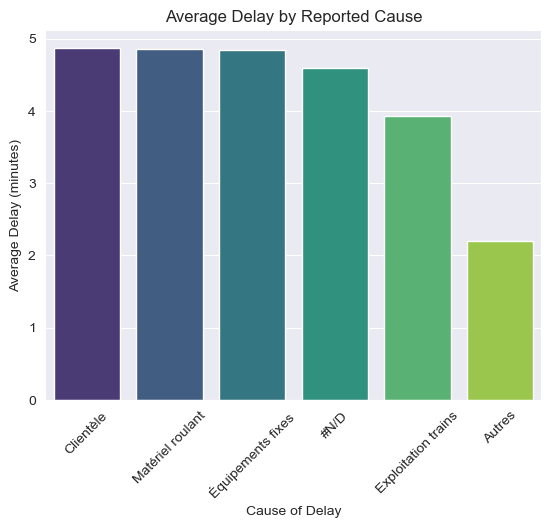

In [22]:
# Graph common causes of train delay

sns.barplot(data=stm_df_causes, x="Cause primaire", y = "delay", palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Delay by Reported Cause")
plt.xlabel("Cause of Delay")
plt.ylabel("Average Delay (minutes)")

In [23]:
# merge primary and secondary causes for delay 

stm_df["cause"] = stm_df["Cause primaire"] + " " + stm_df["Cause secondaire"]

In [ ]:
# Clean up STM Dataframe a little bit to remove extraneous columns

stm_df = stm_df.drop(columns=["Jour calendaire", "Année civile/mois", "Évacuation", "Porte", "KFS", "Véhicule", "Dommage matériel", "Urgence métro", "CAT", "Cause secondaire", "Cause primaire"])

In [24]:
# step 1 for converting subway line values to uniform values - replace the numbered lines with their colour translation! 

translate_key = {
    "1": "verte", 
    "2": "orange",
    "4": "jaune",
    "5": "bleue"
}

stm_df["Ligne"] = stm_df["Ligne"].replace(to_replace=translate_key.keys(), value=translate_key.values())

In [25]:
# convert the time_dt column into a real pandas datetime value

stm_df["time_dt"] = pd.to_datetime(stm_df["time_dt"])

In [28]:
# the following blocks define dictionary values of the number of trips which typically occur on each of the four subway lines (math is off peak + peak trips)

# Orange Line trips per day 

orange_ridesperday_dict = {
    "1": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "2": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "3": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "4": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "5": math.ceil((1.5+7+6.5)*60/5.5 + (2+2)*60/4.5),
    "6": math.ceil(19.5*60/8),
    "7": math.ceil(19*60/8)
}

In [29]:
# Green Line trips per day

verte_ridesperday_dict = {
    "1": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "2": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "3": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "4": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "5": math.ceil((1+7+7.25)*60/6.5 + (2+2)*60/3.5),
    "6": math.ceil(19.5*60/9),
    "7": math.ceil(19*60/9)
}


In [34]:
# Remove all "Subway not affected" lines from the dataframe

stm_df = stm_df[stm_df["Ligne"] != "Non affecté"]

In [33]:
# Assign all "Ligne" rows which are lists of lines (eg. Ligne 1, 2, 4) to the "Multi-Line" category instead. 

row_collector = []

for row in stm_df["Ligne"]:
    print(row)
    if row.find("1") >= 0:
        temp = "Multi-Line"
    elif row.find("2") >= 0:
        temp = "Multi-Line"
    elif row.find("4") >= 0:
        temp = "Multi-Line"
    elif row.find("5") >= 0:
        temp = "Multi-Line"
    else:
        temp = row
    row_collector.append(temp)

stm_df["Ligne"] = row_collector

stm_df.head()
    

Ligne orange
Ligne orange
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne orange
Ligne orange
Ligne orange
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne bleue
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne bleue
Ligne verte
Ligne bleue
Ligne verte
Ligne orange
Ligne verte
Ligne verte
Ligne verte
Ligne orange
Ligne verte
Ligne orange
Ligne verte
Ligne verte
Ligne bleue
Ligne bleue
Ligne orange
Ligne verte
Ligne verte
Ligne orange
Ligne orange
Ligne verte
Ligne verte
Ligne orange
Ligne orange
Ligne orange
Ligne verte
Ligne bleue
Ligne verte
Ligne verte
Ligne verte
Ligne orange
Ligne orange
Ligne verte
Ligne verte
Ligne verte
Ligne orange
Ligne verte
Ligne verte
Ligne orange
Ligne orange
Ligne verte
Ligne bleue
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne verte
Ligne bleue
Ligne verte
L

,Numero d'incident,Type d'incident,Cause primaire,Cause secondaire,Symptome,Ligne,Numéro de tournée,Heure de l'incident,Heure de reprise,Incident en minutes,...,Évacuation,Année civile,Année civile/mois,Mois calendrier,Jour du mois,Jour de la semaine,Jour calendaire,time_dt,delay,cause
0,S01011901,S,Autres,Autres,Clientèle,Ligne orange,#,02:56,03:32,02 min et moins,...,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 02:56:00,2,Autres Autres
1,S01011902,S,Autres,Autres,Clientèle,Ligne orange,#,02:56,03:42,02 min et moins,...,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 02:56:00,2,Autres Autres
2,S01011903,S,Autres,Autres,Clientèle,Ligne verte,#,03:35,04:41,02 min et moins,...,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 03:35:00,2,Autres Autres
3,S01011904,S,Autres,Autres,Clientèle,Ligne verte,#,04:56,05:36,02 min et moins,...,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 04:56:00,2,Autres Autres
4,S01011905,S,Autres,Autres,Clientèle,Ligne verte,#,05:25,05:54,02 min et moins,...,#,2019,2019-01,1,1,2,2019-01-01,2019-01-01 05:25:00,2,Autres Autres


In [30]:
# Yellow Line trips per day 

jaune_ridesperday_dict = {
    "1": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "2": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "3": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "4": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "5": math.ceil((1.5+7+7)*60/6.5 + (2+2)*60/3.5),
    "6": math.ceil(19.5*60/8),
    "7": math.ceil(19*60/8)
}

In [31]:
# blue line trips per day

bleue_ridesperday_dict = {
    "1": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "2": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "3": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "4": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "5": math.ceil((1.5+7+6.75)*60/7 + (2+2)*60/5),
    "6": math.ceil(19.5*60/9.5),
    "7": math.ceil(19*60/9.5)
}

In [32]:
# Average daily ride values - for events which aren't labelled by line

avg_daily_rides = {
    "1": 205,
    "2": 205,
    "3": 205,
    "4": 205,
    "5": 205,
    "6": 135,
    "7": 130
}

In [37]:
# Extract the date out of the "time_dt" column

stm_df["date"] = stm_df["time_dt"].dt.date

stm_delay_perday = stm_df.groupby(["date", "Jour de la semaine", "Ligne"]).count().reset_index()

C:\Users\katwe\AppData\Local\Temp\ipykernel_9228\1970325632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stm_df["date"] = stm_df["time_dt"].dt.date


In [38]:
# add a "day of the week" column to enable matching
stm_delay_perday["weekday"] = stm_delay_perday["Jour de la semaine"] + 1
 
stm_delay_perday.head()

,date,Jour de la semaine,Ligne,Numero d'incident,Type d'incident,Cause primaire,Cause secondaire,Symptome,Numéro de tournée,Heure de l'incident,...,Évacuation,Année civile,Année civile/mois,Mois calendrier,Jour du mois,Jour calendaire,time_dt,delay,cause,weekday
0,2019-01-01,2,Ligne bleue,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3
1,2019-01-01,2,Ligne orange,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,3
2,2019-01-01,2,Ligne verte,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,3
3,2019-01-02,3,Ligne bleue,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,4
4,2019-01-02,3,Ligne jaune,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,4


In [27]:
# collect a fun fact about delays per day of the week! Fun how Friday trips are the most frequently delayed. 

stm_df.groupby('Jour de la semaine')["Jour de la semaine"].count()

Jour de la semaine
1    4510
2    4618
3    4513
4    4660
5    5015
6    3976
7    3502
Name: Jour de la semaine, dtype: int64

In [ ]:
# function to map the total trains per day onto the montreal delay data
def define_daily_rides(row_temp):
    line_temp = str(row_temp["Ligne"])
    day = str(row_temp["weekday"])
    print(line_temp)
    
    if line_temp == "Ligne bleue":
        return bleue_ridesperday_dict.get(day)
    elif line_temp == "Ligne orange":
        return orange_ridesperday_dict.get(day)
    elif line_temp == "Ligne verte":
        return verte_ridesperday_dict.get(day)
    elif line_temp == "Ligne jaune":
        return jaune_ridesperday_dict.get(day)
    else: 
        print("returned other")
        return avg_daily_rides.get(day)

In [ ]:
# execute above daily train mapping function onto stm delay data
stm_delay_perday["total_daily_rides"] = stm_delay_perday.apply(define_daily_rides, axis=1)

In [ ]:
# Calculate reliability, which is 1 - percentage of trips impacted per day
stm_delay_perday["reliability"] = 1 - stm_delay_perday["delay"] / stm_delay_perday["total_daily_rides"]

stm_delay_perday

### Montreal Weather 

In [ ]:
# read in montreal weather to dataframe
montreal_weather_df = pd.read_csv("montreal_weather_simplified.csv")

In [ ]:
# dataframe of the daily date / time and mean temperature 
montreal_weather_means = montreal_weather_df[["Mean Temp (°C)", "Date/Time"]]

In [ ]:
# use a temporary dataframe to change the data type of the STM data "date" column to make merging easier!
stm_df_temp = stm_df
stm_df_temp["date"] = stm_df_temp["date"].astype(str)

# merge weather & STM delay data
stm_df_weather = pd.merge(left=stm_df, right=montreal_weather_means, left_on="date", right_on="Date/Time", how="left")

In [ ]:
# return the date column to a be a datetime object
stm_df_weather["date"] = pd.to_datetime(stm_df_weather["date"])
stm_df_weather.plot(x="date", y="Mean Temp (°C)")

In [ ]:
# initial plot of daily temperature and total delay values
stm_df_weather_monthly = stm_df_weather.groupby(["Année civile", "Mois calendrier"]).agg({"Mean Temp (°C)": 'mean', "delay": 'sum'}).reset_index()

ax = stm_df_weather_monthly.plot()


In [ ]:
# New dataframe, with date, line, and mean temperature
stm_df_weather_daily = stm_df_weather.groupby(["date", "Ligne"])[["delay", "Mean Temp (°C)"]].mean().reset_index() 

In [ ]:
# associating weather and reliability per operational day
stm_delay_perday["date"] = stm_delay_perday["date"].astype(str)
stm_df_weather_daily["date"] = stm_df_weather_daily["date"].astype(str)

stm_df_weather_reliability = pd.merge(left=stm_df_weather_daily, right= stm_delay_perday, left_on=["date", "Ligne"], right_on=["date", "Ligne"], how="left")

stm_df_weather_reliability.drop(columns=["Jour de la semaine", "Jour du mois", "Numero d\'incident", "Type d\'incident", "Symptome", "Numéro de tournée", "Heure de l\'incident", "Heure de reprise", "Incident en minutes", "Porte de voiture", "Type de matériel", "Code de lieu", "time_dt", "delay_y", "cause", "weekday"], inplace=True)

stm_df_weather_reliability = stm_df_weather_reliability.groupby("date").mean(["Mean Temp (°C)", "reliability"])

stm_df_weather_reliability

In [ ]:
# plot reliability with variations in mean temperature 

ax = sns.scatterplot(data=stm_df_weather_reliability, x="date", y="reliability", hue="Mean Temp (°C)", palette="mako")
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Reliability (%)', fontsize=18)
ax.set_title("STM - Average Reliability and Temperature", size=18)
desired_ticks = 10
xticks_positions = np.linspace(0, 1500, desired_ticks)
plt.xticks(xticks_positions, rotation=45)
plt.show()

In [ ]:
# join yeah and month together to form a "year-month" column
stm_df_weather_monthly["year-month"] = stm_df_weather_monthly["Année civile"].astype(str) + "-" + stm_df_weather_monthly["Mois calendrier"].astype(str)

# plot mean delay per day, using this new "year-month" column
#First line and first axis
ax1= sns.lineplot(x="year-month", y='delay', data=stm_df_weather_monthly, label= 'Delay')
ax1.set_ylabel('Avg Min Delay per day')
ax1.set_xlabel('Date')
ax1.legend(loc='upper left')
desired_ticks = 10
xticks_positions = np.linspace(0, 100, desired_ticks)
plt.xticks(xticks_positions)

# Second line on the second y-axis
ax2 = ax1.twinx()
ax2.set_ylim([0, 60])
ax2.set_ylabel('Mean Temp (°C)')
ax2.set_xlabel('Date')
ax2.legend(loc='upper right')
sns.lineplot(x="year-month", y='Mean Temp (°C)', data=stm_df_weather_monthly, ax=ax2, color='orange', label='Mean Temperature')

plt.title('Mean Delay and Mean Monthly Temperature')

plt.show()

## STM GRAPHS AND STATS


In [ ]:
# Graph of reliability over time for the yellow line
grouped_jaune = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne jaune"].groupby("date")["reliability"].mean()
ax = grouped_jaune.plot(color="yellow")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Yellow Line (%)', fontsize=18)
plt.show()

In [ ]:
# Graph of reliability over time for the blue line
grouped_bleue = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne bleue"].groupby("date")["reliability"].mean()
ax = grouped_bleue.plot()
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Blue Line (%)', fontsize=18)
plt.show()

In [ ]:
# Graph of reliability over time for the green
grouped_verte = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne verte"].groupby("date")["reliability"].mean()
ax = grouped_verte.plot(color="green")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Green Line (%)', fontsize=18)
plt.show()

In [ ]:
# Graph of reliability over time for the orange
grouped_orange = stm_delay_perday[stm_delay_perday["Ligne"] == "Ligne orange"].groupby("date")["reliability"].mean()
ax = grouped_orange.plot(color="orange")
ax.set_xlabel('Year / Month', fontsize=18)

ax.set_ylabel('Average Reliability, Orange Line (%)', fontsize=18)
plt.show()

In [ ]:
# PLot boxplot of delay per year
plt.figure(figsize=(10, 5))
plt.title('Subway Delay segmented per year', fontsize=18)
ax = sns.boxplot(x = stm_df['Mois calendrier'] , y = stm_df['delay'])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('month', fontsize=18)
ax.set_ylabel('Delay', fontsize=18)
plt.show()

In [ ]:
# Graph total monthly delay over time on the STM
ax = stm_df.groupby(["Année civile", "Mois calendrier"])["delay"].sum().plot()
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Total Delay (minutes)', fontsize=18)
plt.title('Total STM Subway Delay Over Time', fontsize=18)
plt.show()

In [ ]:
# Graph average monthly delay over time on the STM
ax = stm_df.groupby(["Année civile", "Mois calendrier"])["delay"].mean().plot()
ax.set_xlabel('Year / Month', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
plt.title('Average STM Subway Delay Over Time', fontsize=18)
plt.show()

In [ ]:
# Will it look good to plot total delays by subway line? let's find out!
# Grouping line and delay information 
grouped = stm_df.groupby(['Ligne', stm_df['time_dt'].dt.date])['delay'].sum().reset_index()

# Plot summed delay for each day for each line
for line, group in grouped.groupby('Ligne'):
    plt.scatter(group['time_dt'], group['delay'], label=line)

# Set labels and title
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Total Daily Delay (minutes)', fontsize=18)
plt.show()

In [ ]:
# Will it look good to plot average delays by subway line? let's find out!
# Grouping line and delay information 
grouped = stm_df.groupby(['Ligne', stm_df['time_dt'].dt.date])['delay'].mean().reset_index()

# Plot summed delay for each day for each line
for line, group in grouped.groupby('Ligne'):
    plt.scatter(group['time_dt'], group['delay'], label=line)

# Set labels and title
ax.set_xlabel('Time', fontsize=18)
ax.set_ylabel('Average Delay (minutes)', fontsize=18)
plt.show()

In [ ]:
# make data table - total delays by month 
delay_by_month = stm_df.groupby(["Mois calendrier", "Année civile"])["delay"].sum()

delay_by_month

In [ ]:
# make data table - average delays by month
avg_delay_by_month = stm_df.groupby(["Mois calendrier", "Année civile"])["delay"].mean()

avg_delay_by_month

In [ ]:
# average delay 
stm_average_delay = avg_delay_by_month.mean()
print(stm_average_delay)

In [ ]:
# average reliability
stm_average_reliability = stm_delay_perday["reliability"].mean()

print(stm_average_reliability)